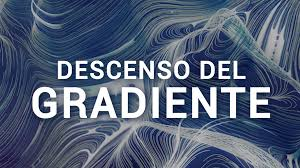

##### Colegio Universitario de Estudios Financieros
#### *MACHINE LEARNING*

_Laura Martínez González de Aledo_

13/11/2020



#### Librerias

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import lmplot
import matplotlib.pyplot as plt
%matplotlib inline

### Datos

In [55]:
data = pd.read_csv('../data/raw/4_1_data.csv')

In [56]:
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [57]:
data.tail()

,score-1,score-2,label
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


#### Visualización de datos

Creamos dos nuevos DataFrames, uno con las notas y otro con los resultados:

In [58]:
scores = data[['score-1', 'score-2']].values 
results = data['label'].values

Creamos dos nuevos DataFrames, uno con los que aprobaron (1) y otro con los que suspendieron (0):

In [59]:
success = (results == 1).reshape(100, 1) 
failed = (results == 0).reshape(100, 1)

Creamos un gráfico de puntos con los que aprobaron y los que suspendieron:

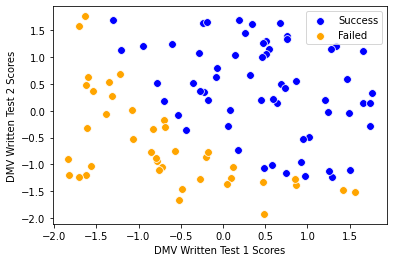

In [78]:
ax = sns.scatterplot(x = scores[success[:, 0], 0],  
                     y = scores[success[:, 0], 1],
                     color = "blue",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                color = "orange",
                s = 60)
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Success", "Failed"])
plt.show()

### Función Sismoide:

Buscamos una función que estire los valores centrales es decir, que los lleve a los extremos para que nos sea más fácil tomar una decisión.

Los valores de una función sismoide están entre 0 y 1 que los que devuelve la probabilidad.

In [88]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [89]:
sigmoid(0)

0.5

#### Gráfica función sismoide

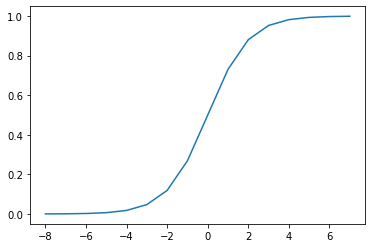

In [87]:
x = np.arange(-8., 8., 1)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

#### Función de Coste:

Todo algoritmo tiene una función de perdida. Esta función depende de los valores de *theta*.

El error global es la suma de los errores teniendo en cuenta todos los registros.

Elegir los cocientes que nos van a dar el menor coste:

- Primera derivada para saber los mínimos y los máximos y saber a dónde tengo que ir.
- Segunda derivada para saber si es cóncava o convexa y la dimensión del paso que tengo que dar.

Al ir derivando nos vamos acercando al punto mínimo según el algoritmo iré más lento o más rápido.

La tasa de aprendizaje consiste en ir explorando el método matemático de búsqueda.

- Derivadas parciales para saber las segundas coordenadas debido a que estamos en una superficie multidireccional..

Luego calculo el error, me quedo con el menor o pararlo cuando no haya mejorado tanto como en el paso anterior porque no me compensa el coste computacional. * (*Esto sólo se puede aplicar cuando hay convergencia)*

In [2]:
def compute_cost(theta, x, y):
    y_pred = sigmoid(np.dot(x , theta)) 
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))  # error
    coste = -1 / m * sum(error)  # coste 
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return coste[0] , gradient

Ahora probamos la función de coste para asegurarnos que funciona correctamente:

In [1]:
mean_scores = np.mean(scores, axis=0) 
std_scores = np.std(scores, axis=0) 
scores = (scores - mean_scores) / std_scores 

rows = scores.shape[0] 
cols = scores.shape[1] 

X = np.append(np.ones((rows, 1)), scores, axis=1) 
y = results.reshape(rows, 1) 

theta_init = np.zeros((cols + 1, 1)) 
cost, gradient = compute_cost(theta_init, X, y) 

print("Cost at initialization", cost) 
print("Gradient at initialization:", gradient) 

NameError: name 'np' is not defined

### Descenso de Gradiente

In [66]:
def gradient_descent(x, y, theta, alpha, iterations): 
    costs = []
    for i in range(iterations): 
        cost, gradient = compute_cost(theta, x, y) 
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

**alpha:** Tasa de aprendizaje del algoritmo

**theta:** Pendiente del gradiente

In [67]:
theta, costs = gradient_descent(X, y, theta_init, 0.75, 1000)

In [36]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.71096165]
 [3.97680144]
 [3.70966736]]
Resulting cost: 0.2034993160837799


#### Gráfica descenso de gradiente

Vemos la convergencia:

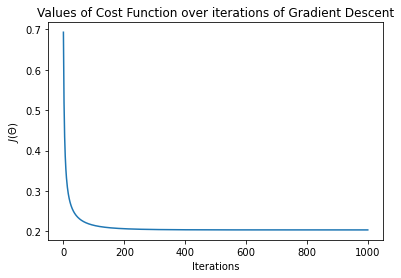

In [37]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

#### Bibliografía
- _https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece_
- _https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f_
- _https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1_  
- _https://scenio.es/descenso-del-gradiente-algoritmo-inteligencia-artificial_